# 1. Linear Regression with OLS(Ordinary Least Square)
#### y = ax + b의 간단한 선형회귀식을 만들어 오차제곱합을 최소화하는 a와 b를 찾아봅시다

In [14]:
# 단순 선형 회귀를 위한 임의의 데이터셋을 생성합니다.
seed = 1215
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=1, noise=3.0, random_state=seed)

X_train = X[:800]
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]

### 1-1. 다음과 같은 산점도(scatter plot)을 그려주세요

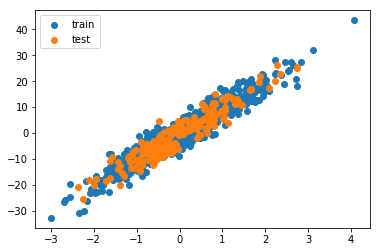

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.scatter(X_test,y_test)
plt.legend(["train", "test"])
plt.show()

### 1-2. h(x) = x+1 일때, train set(X_train, y_train)의 오차 제곱합 평균(Mean Square Error)을 구하세요

In [16]:
from datetime import datetime
def MSE(X_train, y_train):
    error = 0
# Your Code Here(for문을 이용해 짜보세요)
    for i, j in zip(X_train,y_train):
        error += ((j)-(i+1))**2
    error = error / (len(X_train)*2)
    return sum(error)

# seed가 같을 경우 MSE값은 같아야 합니다.
start = datetime.now()
print(MSE(X_train, y_train))
print(datetime.now()-start)

45.27729803412666
0:00:00.004969


### 1.3 h(x) = 2x 일 때, train set(X_train, y_train)의 오차 제곱합 평균(Mean Square Error)을 구하세요

In [17]:
import numpy as np
from datetime import datetime

y_train = y_train.reshape(800,1)

m = y_train.size

# Your Code Here(np.dot과 .T(transpose)를 이용해 짜보세요 MSE with vectorize)
def h(theta,X):
    return theta * X

def MSE(mytheta,X,y):
    
    return np.sum(((y - h(mytheta,X)).T.dot((y - h(mytheta,X))))/(2*m))

start = datetime.now()
print(MSE(2,X_train,y_train))
print(datetime.now()-start)

35.905558387581024
0:00:00.000191


In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(2 * X_train, y_train)

71.81111677516205

### 1-4. sklearn.linear_model의 Linear Regression을 이용해 최적의 a,b를 찾으세요

y = 9.8012X + -0.1666
Mean Squared Error : 9.352834376815956
R^2 : 0.8995829250965823


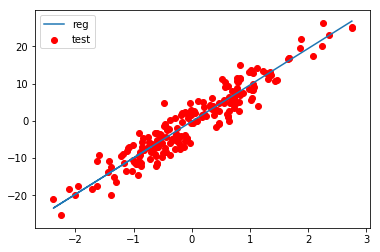

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Your Code Here(sklearn에서 LinearRegression 함수를 불러오고 X_train과 y_train에 적합시켜보세요)
model = LinearRegression().fit(X_train, y_train)
###
###

# optimal a,b based on OLS
print("y = %.4fX + %.4f"%(float(model.coef_[0]),float(model.intercept_)))

# Your Code Here(X_test에 대해서 predict를 해보고 mse를 구해보세요)
y_pred =  model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
###
###

# r2_score
r_square = r2_score(y_test, y_pred)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

# Your Code Here (test set을 scatter plot으로 나타내고, 본인이 구한 선형회귀식을 다음과 같은 직선으로 나타내보세요)
###
###

plt.plot(X_test, y_pred)
plt.scatter(X_test, y_test, color = "r")
plt.legend(["reg","test"])
plt.show()

# 2. Linear Regression with Gradient Descent

![gradientdescent](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/Cost-Function.jpg)

### 2-1. h(x) = ax라는 식을 만들어 Gradient Descent를 이용해 mse를 최소화하는 a를 찾아보세요

In [20]:
iterations = 10000
learningrate = 0.01
m = y_test.size
y_test = y_test.reshape(200,1)

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    for meaningless in range(iterations):
        
        
        #(newtheta = theta-(learningrate/number of training examples)X derivative Loss with respect to theta)
        # Loss function을 theta에 대해 직접 미분해보세요(tip.Chain rule)
        ###
        theta -= (learningrate / m ) * X.T.dot(((theta * X - y))).squeeze()
        
    y_pred = theta*X_test
    
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', round(theta,3), '\n','MSE :', round(MSE(theta, X_test, y_test),3),'\n', 'R^2 :', round(r_square,3))

In [21]:
Gradientdescent(X_train,y_train,0)

Optimal "a" is: 9.803 
 MSE : 4.713 
 R^2 : 0.899


### 2-2. 이번에는 같은 함수에서 iteration 전에 Loss(MSE)를 계산해보고 다음과 같은 plot으로 나타내보세요

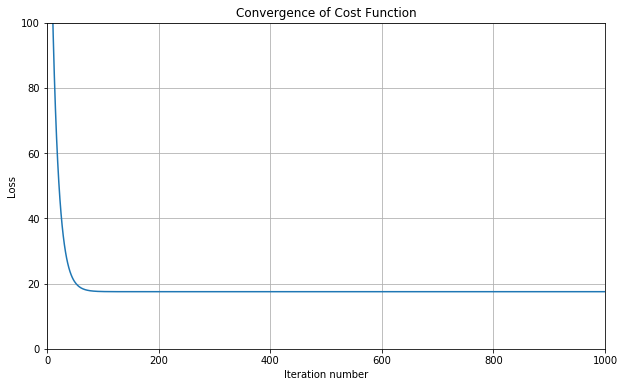

In [22]:
iterations = 10000
learningrate = 0.01
m = y_test.size

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    Loss = []
    for meaningless in range(iterations):
        Loss.append(MSE(theta,X,y))
        theta -= (learningrate / m ) * X.T.dot(((theta * X - y))).squeeze()
    return Loss

Loss = Gradientdescent(X_train,y_train, 0)

plt.figure(figsize=(10,6))
plt.plot(range(0,iterations),Loss)
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.xlim([0,1000])
plt.ylim([0,100])
plt.show()
# Your Code Here


# 2. Logistic Regression

In [23]:
import sklearn.datasets
seed = 1215
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative = 2, n_redundant = 0, n_repeated = 0,random_state = seed)

X_train = X[:800]
X_train = X_train[:,0]
X_test = X[800:]
X_test = X_test[:,0]
y_train = y[:800]
y_test = y[800:]

### 2-1. 다음과 같은 산점도를 그려주세요

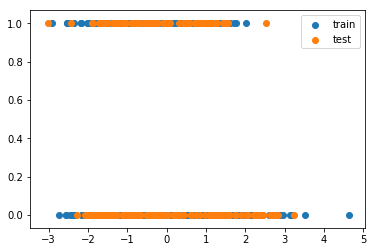

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.legend(["train", "test"])
plt.show()

### 2-2. 가중치가 1일 때 loss를 계산해보세요. h(x) = 1/1+e^-x 입니다
![logisticregression](https://i.stack.imgur.com/XbU4S.png)

In [40]:

def sigmoid(x, mytheta):
    try:
        sig = 1 / (1 + np.exp(-mytheta*x))
    except:
        sig = 0
    return sig

In [41]:
import sys
eps = sys.float_info.epsilon
def LogisticLoss(X, y, mytheta):
    error0 = 0
    error1 = 0
    
    for i, j in zip(X, y):
        if j == 0:
            error0 -= np.log(1-sigmoid(i,mytheta)+eps)
        elif j == 1:
            error1 -= np.log(sigmoid(i,mytheta)+eps)
    return (error0+error1)/len(y)

# seed가 같을 경우 LogisticLoss값은 같아야 합니다.
print(LogisticLoss(X_train, y_train, 1))

0.8341687267245144


### 2-3. Gradient Descent 기반으로 주어진 loss를 최소화하는 weight를 찾아보세요.

In [42]:
iterations = 1000
learningrate = 0.01
m = y_train.size

# 초기값은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    for meaningless in range(iterations):
        #derivative = -X.T.dot((y - sigmoid(X,theta))) / len(X)
        
        #theta -= learningrate * derivative
        #theta = theta - (learningrate/len(X))*(-X.T.dot((y-sigmoid(X,theta))))
        theta = theta - (learningrate/len(X))*np.sum((sigmoid(X,theta)-y)*X)
        # Your Code Here
        # Cross Entropy Loss를 theta에 대해 미분하면 됩니다.
        # Cross Entropy Loss 미분은 아래의 동영상을 참고하세요
        # https://www.youtube.com/watch?v=mLth3-4yn4Q 
        ###

    
    LogisticLoss(X_test, y_test, theta)
    return print('Optimal "a" is:', round(theta,3), '\n','Logistic Loss :', round(LogisticLoss(X_test, y_test, theta),3))

In [43]:
Gradientdescent(X_train,y_train,100)

Optimal "a" is: 94.91 
 Logistic Loss : 16.515


### 2-4. Loss의 변화를 plot으로 나타내보세요.

In [12]:
iterations = 1000
learningrate = 0.01
m = y_train.size

# 초기값은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    loss = []
    for meaningless in range(iterations):
        loss.append(LogisticLoss(X,y,theta))
        derivative = -X.T.dot((y - sigmoid(X,theta))) / len(X)
        #(learningrate/len(X))*(-X.T.dot((y-sigmoid(X,theta))))
        theta -= learningrate * derivative
        #Your Code Here
        ###
        ###
        ###
    LogisticLoss(X_test, y_test, theta)
    return loss

In [13]:
# 100으로 하면 Convergence가 좀 더 잘 보입니다.
Loss = Gradientdescent(X_train,y_train,100)

NameError: name 'LogisticLoss' is not defined

(0, 100)

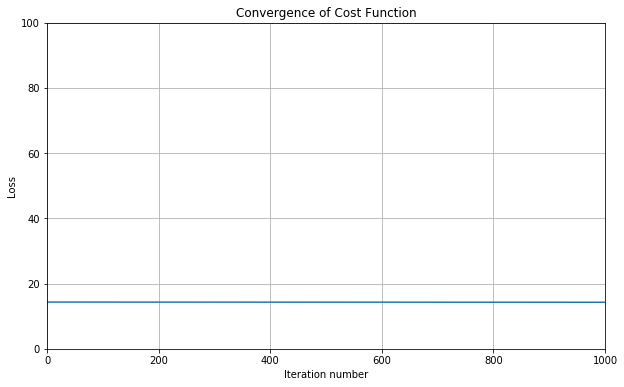

In [45]:
plt.figure(figsize=(10,6))
plt.plot(Loss)
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.xlim([0,1000])
plt.ylim([0,100])
#Your Code Hereaa


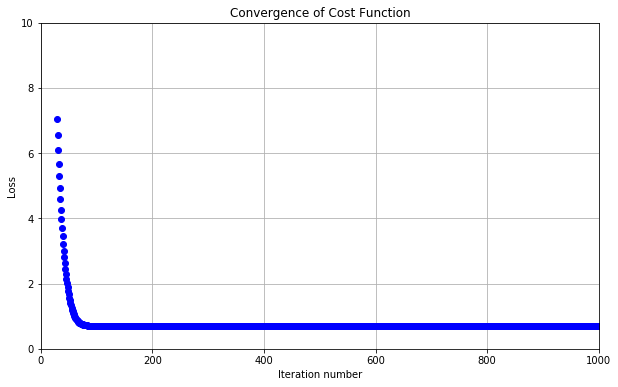

In [19]:
# plt.figure(figsize=(10,6))
# plt.grid(True)
# plt.title("Convergence of Cost Function")
# plt.xlabel("Iteration number")
# plt.ylabel("Loss")
# plt.xlim([0,1000])
# plt.ylim([0,10])
# #Your Code Hereaa


# 고생하셨습니다 :)